# Install packages

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install pyproj==1.9.6


  Using cached https://files.pythonhosted.org/packages/26/8c/1da0580f334718e04f8bbf74f0515a7fb8185ff96b2560ce080c11aa145b/pyproj-1.9.6.tar.gz
  Created wheel for pyproj: filename=pyproj-1.9.6-cp36-cp36m-linux_x86_64.whl size=3702136 sha256=f61478e8129de7b19e78f5a87de4a18ecd3fd7c2fa6e67ba176ce5cb0f256f0e
  Stored in directory: /root/.cache/pip/wheels/02/cd/b1/a2d6430f74c7a778a43d62f78bec109ca69c732dc9b929142a
Successfully built pyproj


In [ ]:
!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgeos-dev is already the newest version (3.6.2-1build2).
0 upgraded, 0 newly installed, 0 to remove and 12 not upgraded.
  Using cached https://github.com/matplotlib/basemap/archive/master.zip
  Using cached https://files.pythonhosted.org/packages/ca/1f/e9cc2c3fce32e2926581f8b6905831165235464c858ba550b6e9b8ef78c3/pyshp-2.1.2.tar.gz
  Created wheel for basemap: filename=basemap-1.2.1-cp36-cp36m-linux_x86_64.whl size=121756173 sha256=f285ca84944495b737ce24754b21554fa83a070b8658cac94b5920fa1e8a45f0
  Stored in directory: /tmp/pip-ephem-wheel-cache-t6lftn1h/wheels/98/4a/fc/ce719b75d97e646645c225f3332b1b217536100314922e9572
  Created wheel for pyshp: fil

In [ ]:
!pip install pandana

  Using cached https://files.pythonhosted.org/packages/03/da/cc8f483a1d43b4171e4a5ea262d063a61c0cb2e82603c61a0dd2299f9082/pandana-0.5.1.tar.gz
  Created wheel for pandana: filename=pandana-0.5.1-cp36-cp36m-linux_x86_64.whl size=1331613 sha256=b50167b3fa1064dcc450aabf1d4cffe70187dccd38b47b472fde83fc373cbfac
  Stored in directory: /root/.cache/pip/wheels/97/9e/69/0ef74cbc869f3e5f7eb045bcc8d752d49d4d0a07be0a208d76
Successfully built pandana


In [ ]:
!pip install osmnet

     |████████████████████████████████| 972kB 7.5MB/s 
     |████████████████████████████████| 14.8MB 324kB/s 
     |████████████████████████████████| 6.5MB 42.0MB/s 
  Found existing installation: pyproj 1.9.6
    Uninstalling pyproj-1.9.6:
      Successfully uninstalled pyproj-1.9.6


# Import libraries

In [ ]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import pandana, matplotlib.pyplot as plt
from pandana.loaders import osm
%matplotlib inline

In [ ]:
import pandas as pd
import numpy as np
import geopy

# Initialize variables

In [ ]:
bbox = [14.34803, 120.906221, 14.785335, 121.134965] #lat-long bounding box for metro manila
# bbox = [14.589369, 120.989763, 14.776414, 121.133832] #lat-long bounding box for quezon city
amenity = 'police' #accessibility to this type of amenity
distance = 500 #max distance in meters
place = 'Metro Manila'
filepath = "/content/drive/My Drive/pandanas accessibility/"

# Query the OSM API for the street network within the specified bounding box


In [ ]:
network = osm.pdna_network_from_bbox(bbox[0], bbox[1], bbox[2], bbox[3])
# how many network nodes did we get for this bounding box?
len(network.node_ids)

/usr/local/lib/python3.6/dist-packages/osmnet/load.py:445: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  gdf.crs = crs
/usr/local/lib/python3.6/dist-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


Requesting network data within bounding box from Overpass API in 1 request(s)
Posting to http://www.overpass-api.de/api/interpreter with timeout=180, "{'data': '[out:json][timeout:180];(way["highway"]["highway"!~"motor|proposed|construction|abandoned|platform|raceway"]["foot"!~"no"]["pedestrians"!~"no"](14.34803000,120.90622100,14.78533500,121.13496500);>;);out;'}"
Downloaded 58,424.3KB from www.overpass-api.de in 6.26 seconds
Downloaded OSM network data within bounding box from Overpass API in 1 request(s) and 7.58 seconds
Returning OSM data with 376,760 nodes and 111,916 ways...
Edge node pairs completed. Took 190.38 seconds
Returning processed graph with 148,409 nodes and 207,074 edges...
Completed OSM data download and Pandana node and edge table creation in 205.30 seconds


148409

In [ ]:
# Save network
net_nodes = network.nodes_df.to_csv(filepath + 'data/qc_nodes.csv')
net_edges = network.edges_df.to_csv(filepath + 'data/qc_edges.csv')

In [ ]:
# Load network
nodes = pd.read_csv(filepath + 'data/nodes.csv', index_col=0)
edges = pd.read_csv(filepath + 'data/edges.csv', index_col=[0,1])

network = pandana.Network(nodes['x'], nodes['y'], 
                          edges['from'], edges['to'], edges[['distance']])

## Download points of interest (POIs) and network data from OpenStreetMap

In [ ]:
pois = osm.node_query(bbox[0], bbox[1], bbox[2], bbox[3], tags='"amenity"="{}"'.format(amenity))
pois[['amenity', 'name', 'lat', 'lon']].head()

,amenity,name,lat,lon
id,,,,
255049917,police,Makati Police Precint 8,14.549011,121.065257
255049933,police,Police Community Precinct № 2,14.458530,120.970176
255049936,police,Pcp-2,14.663461,120.984020
255050240,police,Police Community Precinct 2,14.581231,121.029830
255051494,police,CAA Police Community Precinct 4,14.457091,120.994751


# Get zipcode using coordinates

In [ ]:
!pip install geopy

In [ ]:
import geopy
import pandas as pd
import numpy as np

# resolves a pair of coordinates to an address
def get_zipcode(df, geolocator, lat_field, lon_field):
  try:
    location = geolocator.reverse((df[lat_field], df[lon_field]))
    return location.address.split(",")[-2]
  except:
    return None


geolocator = geopy.Nominatim(user_agent='qc_places')

In [ ]:
mm_df = network.nodes_df.reset_index()

In [ ]:
 df_arrs = np.array_split(mm_df, mm_df.shape[0] // 1000)

In [ ]:
%time list_dfs_with_zipcode = [df.apply(get_zipcode, axis=1, geolocator=geolocator, lat_field='y', lon_field='x') for df in df_arrs[:2]]

In [ ]:
mm_df['zipcodes'] = pd.concat(list_dfs_with_zipcode)

In [ ]:
mm_df.to_csv(filepath+ 'data/mm_network_zipcode_2.csv', index=False, encoding='utf-8')

## Process the network data then compute accessibility

In [ ]:
# initialize a category for this amenity with the locations specified by the lon and lat columns
network.set_pois(category='my_amenity', maxdist = distance, maxitems = 10, x_col=pois['lon'], y_col=pois['lat'])

In [ ]:
# search for the n nearest amenities to each node in the network
access = network.nearest_pois(distance=distance, category='my_amenity', num_pois=10)

# each df cell represents the network distance from the node to each of the n POIs
access.head()

,1,2,3,4,5,6,7,8,9,10
id,,,,,,,,,,
12067302,304.347992,431.032990,500.000000,500.0,500.0,500.0,500.0,500.0,500.0,500.0
12067330,0.000000,302.881012,385.700012,500.0,500.0,500.0,500.0,500.0,500.0,500.0
12067342,500.000000,500.000000,500.000000,500.0,500.0,500.0,500.0,500.0,500.0,500.0
12067373,303.760010,369.907013,500.000000,500.0,500.0,500.0,500.0,500.0,500.0,500.0
12067375,478.135010,500.000000,500.000000,500.0,500.0,500.0,500.0,500.0,500.0,500.0


In [ ]:
access_1 = pd.merge(mm_df,access.reset_index(), on='id')

In [ ]:
access_1.head()

In [ ]:
poi_filename = filepath + 'data/pois_{}_{}.csv'.format(amenity, place)
access.to_csv(poi_filename, index=False, encoding='utf-8')

## Plot the accessibility

In [ ]:
# keyword arguments to pass for the matplotlib figure
bbox_aspect_ratio = (bbox[2] - bbox[0]) / (bbox[3] - bbox[1])
fig_kwargs = {'facecolor':'w', 
              'figsize':(10, 10 * bbox_aspect_ratio)}

# keyword arguments to pass for scatter plots
plot_kwargs = {'s':5, 
               'alpha':0.9, 
               'cmap':'viridis_r', 
               'edgecolor':'none'}

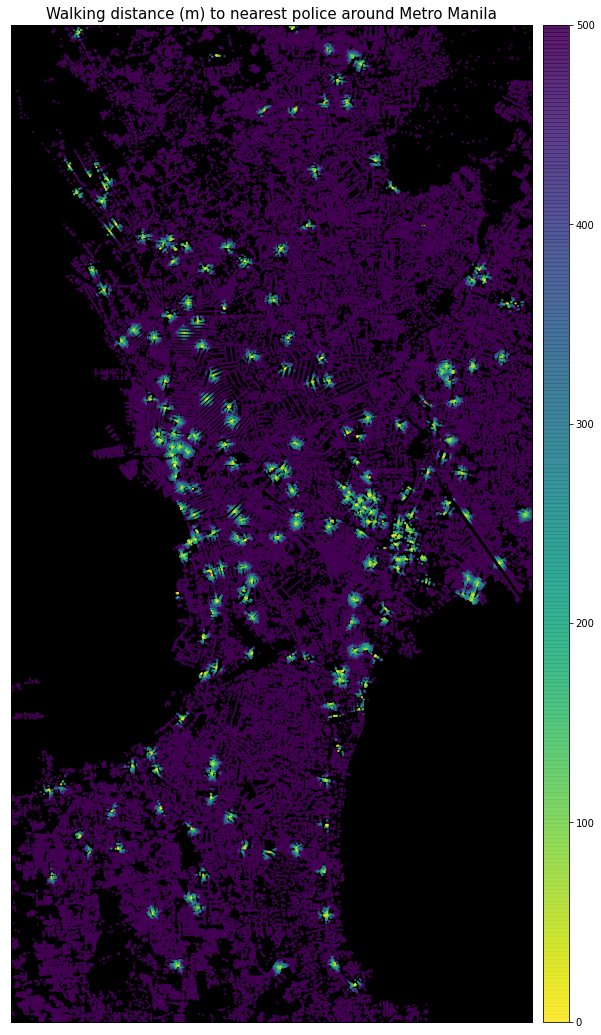

In [ ]:
# plot the distance to the nth nearest amenity
n = 1
bmap, fig, ax = network.plot(access[n], bbox=bbox, plot_kwargs=plot_kwargs, fig_kwargs=fig_kwargs)
ax.set_facecolor('k')
ax.set_title('Walking distance (m) to nearest {} around Metro Manila'.format(amenity), fontsize=15)
# fig.savefig('images/accessibility-pub-east-bay.png', dpi=200, bbox_inches='tight')
plt.show()

# Merge zipcode and nearest pois

In [ ]:
import pandas as pd
police_df = pd.read_csv(filepath + 'data/pois_police_Metro Manila.csv')

In [ ]:
police_df.columns = [f"police_{i}" for i in range(1,11)]
# [f"{am}_1" for am in amenities]

In [ ]:
mm_df = pd.read_csv(filepath + 'data/network_zipcode_2.csv')

In [ ]:
mm_df[mm_df['zipcodes'].isna()]

In [ ]:
zip2_df = mm_df[mm_df['zipcodes'].notna()]

In [ ]:
zip2_df.reset_index(drop=True, inplace=True)

In [ ]:
zip2_df.tail()

In [ ]:
zip2_police_df = pd.merge(zip2_df,police_df,left_index=True, right_index=True)

In [ ]:
zip2_police_df.to_csv(filepath + 'data/zip2_police_metro_manila.csv', index=False, encoding='utf-8')

In [ ]:
zip2_fire_df = pd.read_csv(filepath + 'data/zip2_fire_metro_manila.csv')

In [ ]:
zip2_fire_police_df = pd.merge(zip2_fire_df,fire_df,left_index=True, right_index=True)

In [ ]:
zip2_fire_police_df.to_csv(filepath + 'data/zip2_police_fire_metro_manila.csv', index=False, encoding='utf-8')

In [ ]:
amenities = ['police','fire']

In [ ]:
zip2_fire_police_df[['zipcodes'] + [f"{am}_1" for am in amenities]]

,zipcodes,police_1,fire_1
0,1302,304.347992,500.0
1,1004,0.000000,500.0
2,1000,500.000000,500.0
3,1000,303.760010,500.0
4,1000,478.135010,500.0
...,...,...,...
1994,1103,500.000000,500.0
1995,1103,500.000000,500.0
1996,1103,500.000000,500.0
1997,1103,500.000000,500.0


In [ ]:
data_first_am_df = zip2_fire_police_df[['zipcodes'] + [f"{am}_1" for am in amenities]]
data_first_am_df.columns = [i[:-2] for i in data_first_am_df.columns]

In [ ]:
data_first_am_df

In [ ]:
data_first_am_df['police_score'] = (100 - data_first_am_df['police'] // 5)

In [ ]:
data_first_am_df['fire_safety_score'] = (100 - data_first_am_df['fire'] // 5)

In [ ]:
zip_walk_scores_df = data_first_am_df.groupby('zipcod')[['police_score', 'fire_safety_score']].max().reset_index()
zip_walk_scores_df

,zipcod,police_score,fire_safety_score
0,002,0.0,0.0
1,0913,0.0,0.0
2,0921,43.0,5.0
3,1000,93.0,100.0
4,1001,41.0,0.0
...,...,...,...
155,4114,0.0,0.0
156,4811,0.0,0.0
157,626,28.0,0.0
158,7833,40.0,0.0


# Query using zipcode

In [ ]:
zip_walk_scores_df['zipcod'].values

array([' 002', ' 0913', ' 0921', ' 1000', ' 1001', ' 1002', ' 1003',
       ' 1004', ' 1005', ' 1006', ' 1007', ' 1008', ' 1009', ' 1010',
       ' 1011', ' 1012', ' 1013', ' 1014', ' 1015', ' 1016', ' 1017',
       ' 1018', ' 1019', ' 1050', ' 1067', ' 1099', ' 1100', ' 1101',
       ' 1102', ' 1103', ' 1105', ' 1106', ' 1107', ' 1108', ' 1109',
       ' 1110', ' 1112', ' 1113', ' 1114', ' 1115', ' 1116', ' 1117',
       ' 1118', ' 1119', ' 1121', ' 1123', ' 1126', ' 1128', ' 1132',
       ' 114', ' 1200', ' 1203', ' 1204', ' 1205', ' 1207', ' 1208',
       ' 1209', ' 1210', ' 1213', ' 1215', ' 1219', ' 1220', ' 1221',
       ' 1222', ' 1224', ' 1225', ' 1226', ' 1227', ' 1228', ' 1229',
       ' 1230', ' 1231', ' 1233', ' 1234', ' 1235', ' 1242', ' 1300',
       ' 1301', ' 1302', ' 1303', ' 1304', ' 1305', ' 1306', ' 1307',
       ' 1308', ' 1309', ' 1400', ' 1401', ' 1402', ' 1405', ' 1406',
       ' 1408', ' 1409', ' 1410', ' 1411', ' 1422', ' 1423', ' 1427',
       ' 1428', ' 1438

In [ ]:
zip_walk_scores_df[zip_walk_scores_df['zipcod'] == ' 1114']

,zipcod,police_score,fire_safety_score
38,1114,0.0,0.0
